# Random Forests 
## for (Fruits and Vegetables) Image Classification

Install necessary packages

In [1]:
!pip install tensorflow --user

  Using cached Markdown-3.4.1-py3-none-any.whl (93 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached cachetools-5.2.0-py3-none-any.whl (9.3 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
  Using cached urllib3-1.26.12-py2.py3-none-any.whl (140 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account al

In [4]:
!pip install scikit-learn

  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.2.2 requires jinja2>=2.7.2, which is not installed.
pyldavis 3.2.2 requires numexpr, which is not installed.
nltk 3.7 requires click, which is not installed.
nltk 3.7 requires regex>=2021.8.3, which is not installed.
You should consider upgrading via the 'C:\Users\aog\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Import necessary packages

In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.utils import array_to_img, img_to_array, load_img
from datetime import datetime
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [6]:
#check versions of some packages
print(np.__version__)
print(pd.__version__)

1.23.4
1.3.4


Copy dataset from git repo.

In [7]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset

Cloning into 'Fruit-Images-Dataset'...
Updating files:   2% (2298/90503)
Updating files:   3% (2716/90503)
Updating files:   4% (3621/90503)
Updating files:   5% (4526/90503)
Updating files:   5% (4622/90503)
Updating files:   6% (5431/90503)
Updating files:   7% (6336/90503)
Updating files:   7% (7150/90503)
Updating files:   8% (7241/90503)
Updating files:   9% (8146/90503)
Updating files:  10% (9051/90503)
Updating files:  10% (9616/90503)
Updating files:  11% (9956/90503)
Updating files:  12% (10861/90503)
Updating files:  13% (11766/90503)
Updating files:  13% (12095/90503)
Updating files:  14% (12671/90503)
Updating files:  15% (13576/90503)
Updating files:  16% (14481/90503)
Updating files:  16% (14513/90503)
Updating files:  17% (15386/90503)
Updating files:  18% (16291/90503)
Updating files:  18% (16887/90503)
Updating files:  19% (17196/90503)
Updating files:  20% (18101/90503)
Updating files:  21% (19006/90503)
Updating files:  21% (19262/90503)
Updating files:  22% (19911/9

Set the path directory to the cloned test and train data.
load_dataset() returns the filenames, integer classes and string classes that are stored in file directory.


1.   names_train is a vector that contains the filepath of all images from the training set
2.   names_test is a vector that contains the filepath of all images from the test set
3.   intclass_train is a vector containing the int class values (1-131) of all images from the training set
4.   intclass_test is a vector containing the int class values (1-131) of all images from the test set
5.   stringclass_train is a vector containing the string label of class of all images from the training set
6.   stringclass_test is a vector containing the string label of class of all images from the test set






In [8]:
#recognise the directory of the notebook file
base_dir = os.getcwd()
base_dir

'c:\\Users\\aog\\OneDrive - Universidade de Aveiro\\Desktop\\MCD\\ImageClassification'

In [9]:
train_dir = base_dir+'/Fruit-Images-Dataset/Training/'
test_dir = base_dir+'/Fruit-Images-Dataset/Test/'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files, targets, target_labels

names_train, intclass_train, stringclass_train = load_dataset(train_dir)
names_test, intclass_test, stringclass_test = load_dataset(test_dir)

print('Loading complete!')
print('Training set size : ',  names_train.shape[0])
print('Testing set size : ', names_test.shape[0])
print(stringclass_train)
print(intclass_train.shape)
print(stringclass_train.shape)

Loading complete!
Training set size :  67692
Testing set size :  22688
['Apple Braeburn' 'Apple Crimson Snow' 'Apple Golden 1' 'Apple Golden 2'
 'Apple Golden 3' 'Apple Granny Smith' 'Apple Pink Lady' 'Apple Red 1'
 'Apple Red 2' 'Apple Red 3' 'Apple Red Delicious' 'Apple Red Yellow 1'
 'Apple Red Yellow 2' 'Apricot' 'Avocado' 'Avocado ripe' 'Banana'
 'Banana Lady Finger' 'Banana Red' 'Beetroot' 'Blueberry' 'Cactus fruit'
 'Cantaloupe 1' 'Cantaloupe 2' 'Carambula' 'Cauliflower' 'Cherry 1'
 'Cherry 2' 'Cherry Rainier' 'Cherry Wax Black' 'Cherry Wax Red'
 'Cherry Wax Yellow' 'Chestnut' 'Clementine' 'Cocos' 'Corn' 'Corn Husk'
 'Cucumber Ripe' 'Cucumber Ripe 2' 'Dates' 'Eggplant' 'Fig' 'Ginger Root'
 'Granadilla' 'Grape Blue' 'Grape Pink' 'Grape White' 'Grape White 2'
 'Grape White 3' 'Grape White 4' 'Grapefruit Pink' 'Grapefruit White'
 'Guava' 'Hazelnut' 'Huckleberry' 'Kaki' 'Kiwi' 'Kohlrabi' 'Kumquats'
 'Lemon' 'Lemon Meyer' 'Limes' 'Lychee' 'Mandarine' 'Mango' 'Mango Red'
 'Mangostan' 

In [10]:
print(stringclass_train.shape)
print(stringclass_test.shape)

(131,)
(131,)


Show distribution of images to the different classes.

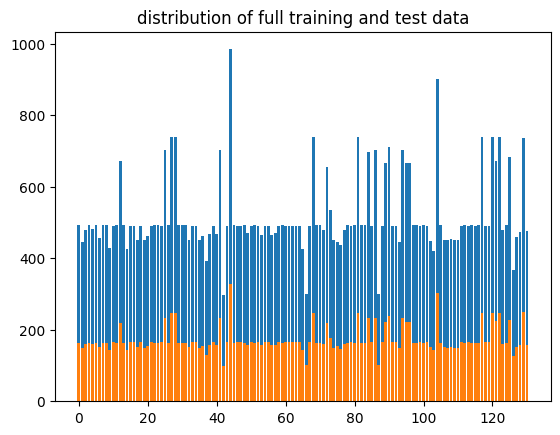

In [11]:
(intclass, counts) = np.unique(intclass_train, return_counts=True)
plt.bar(intclass, counts)
plt.title('distribution of full training and test data')
full_train_frequencies = np.asarray((intclass, counts)).T

(intclass, counts) = np.unique(intclass_test, return_counts=True)
plt.bar(intclass, counts)
full_test_frequencies = np.asarray((intclass, counts)).T

Datasets can be reduced for compiling: original size of the training dataset is 67692 images; original size of the test dataset is 22688 images.

In [12]:
i = 0
while i < 20:
  print('Name : ', names_train[i])
  print('Intclass : ', intclass_train[i])
  i+=1


Name :  c:\Users\aog\OneDrive - Universidade de Aveiro\Desktop\MCD\ImageClassification/Fruit-Images-Dataset/Training/Cherry 2\r_263_100.jpg
Intclass :  27
Name :  c:\Users\aog\OneDrive - Universidade de Aveiro\Desktop\MCD\ImageClassification/Fruit-Images-Dataset/Training/Nut Pecan\73_100.jpg
Intclass :  73
Name :  c:\Users\aog\OneDrive - Universidade de Aveiro\Desktop\MCD\ImageClassification/Fruit-Images-Dataset/Training/Melon Piel de Sapo\r_45_100.jpg
Intclass :  68
Name :  c:\Users\aog\OneDrive - Universidade de Aveiro\Desktop\MCD\ImageClassification/Fruit-Images-Dataset/Training/Redcurrant\120_100.jpg
Intclass :  114
Name :  c:\Users\aog\OneDrive - Universidade de Aveiro\Desktop\MCD\ImageClassification/Fruit-Images-Dataset/Training/Strawberry Wedge\r_176_100.jpg
Intclass :  117
Name :  c:\Users\aog\OneDrive - Universidade de Aveiro\Desktop\MCD\ImageClassification/Fruit-Images-Dataset/Training/Peach\206_100.jpg
Intclass :  80
Name :  c:\Users\aog\OneDrive - Universidade de Aveiro\Des

In [13]:
print('Training set size : ',  names_train.shape[0])
print('Testing set size : ', names_test.shape[0])

Training set size :  67692
Testing set size :  22688


Amount of different classes in the test set.

In [14]:
n_classes = len(np.unique(intclass_test))
n_classes


131

Change name of image to actual pixel array.
The _images_array are the inputs (100x100 pixels with 3 color channels).


In [15]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

train_images_array = np.array(convert_image_to_array(names_train))
print('Training set shape : ', train_images_array.shape)

test_images_array = np.array(convert_image_to_array(names_test))
print('Test set shape : ', test_images_array.shape)

print('1st training image shape ',train_images_array[0].shape)

Training set shape :  (67692, 100, 100, 3)
Test set shape :  (22688, 100, 100, 3)
1st training image shape  (100, 100, 3)


Pixel arrays of one image (100x100 pixels, 3 color channels).

In [16]:
print('1st training image as array',train_images_array[0])

1st training image as array [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


Rescale pixel values from 0-255 range to 0-1.


1.   train_images_array is an array containing the normalized pixel values of the train images.
2.   test_images_array is an array containing the normalized pixel values of the test images.
3.   valid_images_array is an array containing the normalized pixel values of the validation images.



In [17]:
train_images_array = train_images_array.astype('float32')/255
test_images_array = test_images_array.astype('float32')/255

In [18]:
#split the training dataset ito trainset anbd testset (reduce computation power)
new_train_images_array, new_test_images_array, new_train_intclass, new_test_intclass = train_test_split(train_images_array, intclass_train, test_size=0.3, random_state=42)

In [19]:
print('Training set size : ',  names_train.shape[0])
print('Testing set size : ', names_test.shape[0])
print('Training set LABELS size : ',intclass_train.shape)
print('Testing set LABELS size : ',intclass_test.shape)

Training set size :  67692
Testing set size :  22688
Training set LABELS size :  (67692,)
Testing set LABELS size :  (22688,)


In [20]:
n_classes_train = len(np.unique(intclass_train))
print('Number of classes in training: ',n_classes_train)
n_classes_test = len(np.unique(intclass_test))
print('Number of classes in testing: ',intclass_test)

Number of classes in training:  131
Number of classes in testing:  [107  64  88 ...  58  64  16]


In [21]:
print('New Training set size : ',  new_train_images_array.shape[0])
print('New Testing set size : ', new_test_images_array.shape[0])
print('New Training set LABELS size : ', new_train_intclass.shape)
print('New Testing set LABELS size : ',new_test_intclass.shape)

New Training set size :  47384
New Testing set size :  20308
New Training set LABELS size :  (47384,)
New Testing set LABELS size :  (20308,)


In [22]:
n_classes_train = len(np.unique(new_train_intclass))
print('Number of classes in new training: ',n_classes_train)
n_classes_test = len(np.unique(new_test_intclass))
print('Number of classes in new testing: ',n_classes_test)

Number of classes in new training:  131
Number of classes in new testing:  131


Following the code in the link below

https://www.analyticsvidhya.com/blog/2022/01/image-classification-using-machine-learning/


Flattening the arrays
shape of the arrays should be a vector of 30000 features
in order to be undersantable by skleaarn

In [23]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = new_train_images_array.shape
train_flat_images_array = new_train_images_array.reshape((nsamples,nx*ny*nrgb))

In [24]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = new_test_images_array.shape
test_flat_images_array = new_test_images_array.reshape((nsamples,nx*ny*nrgb))

#### 1st gridsearch

In [25]:
# Getting the current date and time
dt1 = datetime.now()

# getting the timestamp
ts1 = datetime.timestamp(dt1)

print("Date and time is:", dt1)
print("Timestamp is:", ts1)

Date and time is: 2022-11-17 18:01:16.711294
Timestamp is: 1668708076.711294


In [26]:
#defining the Random Forest model from sklearn
rf=RandomForestClassifier()

#range of values for each of the parameters
param_grid={
    'n_estimators':[1,10, 20],
    'criterion': ['gini', 'entropy'],
    'max_depth':[10,50,100],
    'max_features':['sqrt', 'log2'], 
    'min_impurity_decrease':[0.05,0.1,0.5],
    'bootstrap':[False],
    'random_state':[42],
    'ccp_alpha':[0.05,0.1,0.5],
}
#applying 5-fold cross validation to choose hyperparameter
rf_gs=GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

In [ ]:
#fiting the model to the "new training" dataset
rf_gs.fit(train_flat_images_array,new_train_intclass)

In [ ]:
# Getting the current date and time
dt2 = datetime.now()

# getting the timestamp
ts2 = datetime.timestamp(dt2)

print("Date and time is:", dt2)
print("Timestamp is:", ts2)

In [ ]:
# difference between dates in timedelta
# time necessary to get the best model with this parameter options
delta = dt2 - dt1
print(f'Difference is {delta.seconds} seconds')
print(f'Difference is {delta.seconds/60} minutes')
print(f'Difference is {delta.seconds/3600} hours')

In [ ]:
# parameters for the best model found in the grid search
best_params = rf_gs.best_estimator_.get_params()
best_params

In [ ]:
# predictions for the "new test" dataset
intclass_test_pred=rf_gs.best_estimator_.predict(test_flat_images_array)
intclass_test_pred

In [ ]:
# calculate accuracy on the "new test" dataset
acc = accuracy_score(intclass_test_pred,new_test_intclass)
acc

In [ ]:
print("The predicted Data is :")
print(np.array(intclass_test_pred))
print("The actual data is:")
print(np.array(new_test_intclass))
print(f"The model is {acc*100}% accurate (in the test set)")

In [ ]:
#extra metrics (precision, recall and f1-score)
print(classification_report(intclass_test_pred,new_test_intclass))

Ploting the Consusion Matrix

In [ ]:
cm = confusion_matrix(intclass_test_pred,new_test_intclass)
df = pd.DataFrame(cm).replace(0, np.nan)
plt.figure(figsize=[20,20])
sns.heatmap(df, annot=True, fmt='g', cmap="Blues")
plt.show()

#### 2nd ieration of gridsearch for parameters
repeat the same steps but changing te parameters

In [ ]:
rf=RandomForestClassifier()

In [ ]:
# Getting the current date and time
dt1 = datetime.now()

# getting the timestamp
ts1 = datetime.timestamp(dt1)

print("Date and time is:", dt1)
print("Timestamp is:", ts1)

In [ ]:

param_grid={
    'n_estimators':[10, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth':[5,10,15],
    'max_features':['log2', 'auto'],
    'min_impurity_decrease':[0.0, 0.025, 0.05],
    'bootstrap':[False],
    'random_state':[42],
    'ccp_alpha':[0.0, 0.025, 0.05],
}
#applying 5-fold cross validation to choose hyperparameter
rf_gs2=GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

In [ ]:
rf_gs2.fit(train_flat_images_array,new_train_intclass)

In [ ]:
# Getting the current date and time
dt2 = datetime.now()

# getting the timestamp
ts2 = datetime.timestamp(dt2)

print("Date and time is:", dt2)
print("Timestamp is:", ts2)

In [ ]:
# difference between dates in timedelta
delta = dt2 - dt1
print(f'Difference is {delta.seconds} seconds')
print(f'Difference is {delta.seconds / 60} minutes')
print(f'Difference is {delta.seconds / 3600} hours')

In [ ]:
best_params2 = rf_gs2.best_estimator_.get_params()
best_params2

In [ ]:
intclass_test_pred2 = rf_gs2.best_estimator_.predict(test_flat_images_array)
intclass_test_pred2

In [ ]:
acc2 = accuracy_score(intclass_test_pred2,new_test_intclass)
acc2

In [ ]:
print("The predicted Data is :")
print(np.array(intclass_test_pred2))
print("The actual data is:")
print(np.array(new_test_intclass))
print(f"The model is {acc2*100}% accurate (in the test set)")

In [ ]:
print(classification_report(intclass_test_pred2,new_test_intclass))

In [ ]:
cm2 = confusion_matrix(intclass_test_pred2,new_test_intclass)

df2 = pd.DataFrame(cm2).replace(0, np.nan)

plt.figure(figsize=[20,20])
sns.heatmap(df2, annot=True, fmt='g', cmap="Blues")
plt.show()

#### Retraining a Random Forest
with the best found parameters 
- with 5-fold cv on the "new training" dataset
(evaluating the performance on the cv)
- with the full "new training" dataset
(evaluating the performance on the "new train" set, on the "new test" set and on the original test set)

Since we were not able to get the best parameters with the second iteration of gridsearch
we will use the first iteration best parameters

In [29]:
final_rf = RandomForestClassifier( #best_params2 should perform better
 bootstrap = False,
 ccp_alpha = 0.05,
 criterion = 'entropy',
 max_depth = 10,
 max_features = 'log2',
 min_impurity_decrease = 0.05,
 n_estimators = 20,
 random_state=42)

#train the model using 5.fold cross validation
cv_scores = cross_val_score(final_rf, train_flat_images_array, new_train_intclass, cv=5)
cv_scores

array([0.55006859, 0.54088847, 0.53571805, 0.54415954, 0.54062896])

In [31]:
print("{:.2f}% accuracy with a standard deviation of {:.2f}%".format (cv_scores.mean()*100, cv_scores.std()*100))

54.23% accuracy with a standard deviation of 0.47%


In [32]:
#train the model using the full "new train" set
final_rf.fit(train_flat_images_array,new_train_intclass)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.05, criterion='entropy',
                       max_depth=10, max_features='log2',
                       min_impurity_decrease=0.05, n_estimators=20,
                       random_state=42)

##### evaluation

on "new train" set

In [37]:
intclass_train_pred = final_rf.predict(train_flat_images_array)
intclass_train_pred

array([ 79,  27,  60, ...,  36, 125,  50])

In [38]:
acc_train = accuracy_score(intclass_train_pred,new_train_intclass)
acc_train

0.5461548201924701

In [39]:
print("The predicted Data is :")
print(np.array(intclass_train_pred))
print("The actual data is:")
print(np.array(new_train_intclass))
print(f"The model is {acc_train*100}% accurate (in the test set)")

The predicted Data is :
[ 79  27  60 ...  36 125  50]
The actual data is:
[79 56 60 ... 42  1 50]
The model is 54.61548201924701% accurate (in the test set)


In [40]:
print(classification_report(intclass_train_pred,new_train_intclass))

              precision    recall  f1-score   support

           0       0.64      0.30      0.41       742
           1       0.00      0.00      0.00         0
           2       0.09      0.60      0.15        50
           3       0.84      0.53      0.65       544
           4       0.64      0.47      0.54       457
           5       0.98      0.30      0.46      1204
           6       0.21      1.00      0.35        67
           7       0.24      0.61      0.34       139
           8       0.19      0.53      0.28       115
           9       0.01      1.00      0.01         2
          10       0.19      0.95      0.32        63
          11       0.01      1.00      0.03         5
          12       0.33      0.62      0.43       246
          13       0.98      0.42      0.59       789
          14       0.64      0.87      0.74       220
          15       1.00      0.55      0.71       622
          16       0.70      0.39      0.50       638
          17       0.01    

c:\Users\aog\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aog\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aog\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

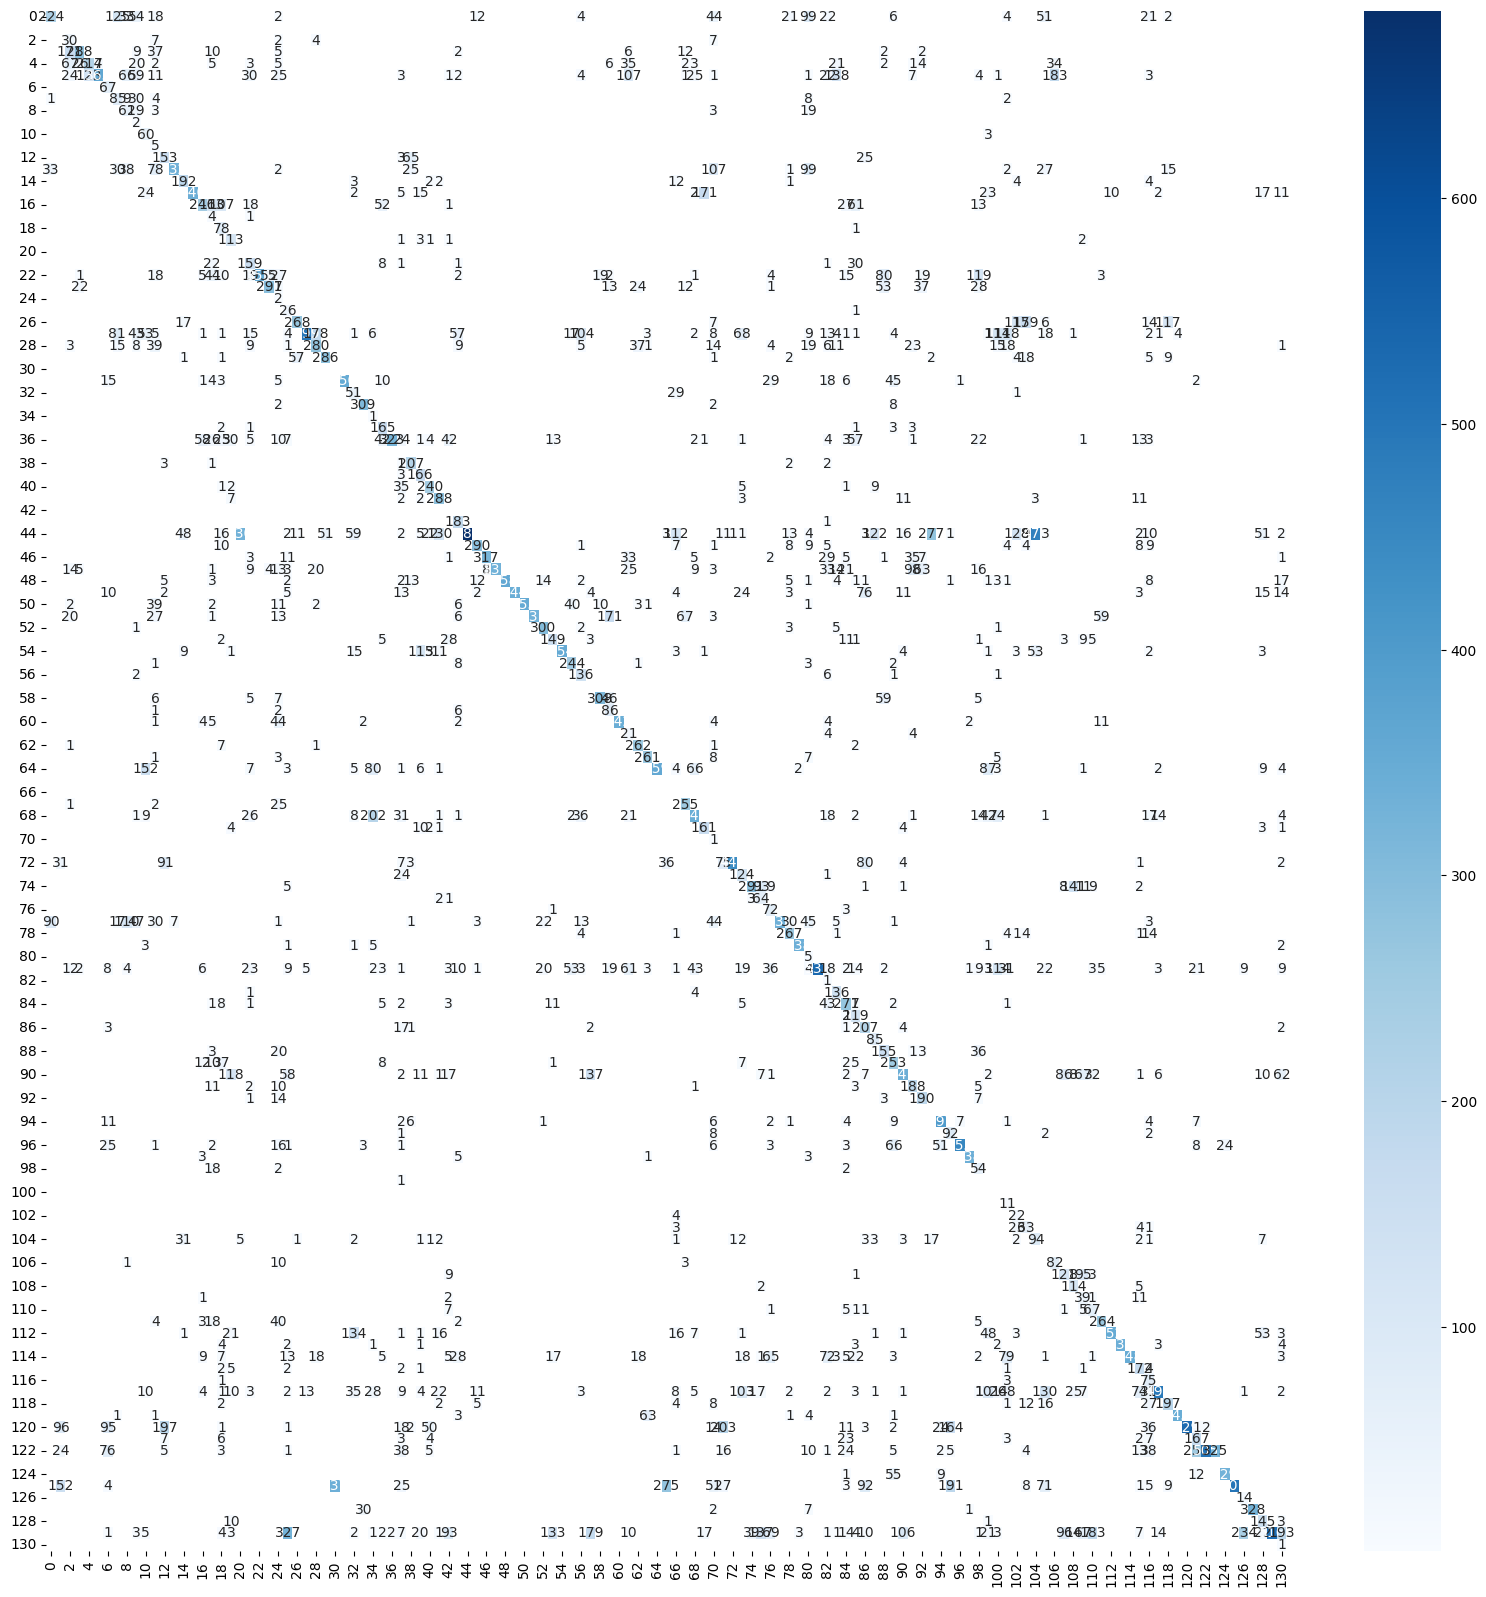

In [47]:
cm = confusion_matrix(intclass_train_pred,new_train_intclass)
df = pd.DataFrame(cm).replace(0, np.nan)
plt.figure(figsize=[20,20])
sns.heatmap(df, annot=True, fmt='g', cmap="Blues")
plt.show()

on "new test" set

In [33]:
intclass_test_pred3 = final_rf.predict(test_flat_images_array)
intclass_test_pred3

array([ 74,  44,  81, ...,  63, 114,  29])

In [34]:
acc3 = accuracy_score(intclass_test_pred3,new_test_intclass)
acc3

0.525408705928698

In [35]:
print("The predicted Data is :")
print(np.array(intclass_test_pred3))
print("The actual data is:")
print(np.array(new_test_intclass))
print(f"The model is {acc3*100}% accurate (in the test set)")

The predicted Data is :
[ 74  44  81 ...  63 114  29]
The actual data is:
[ 74  66 105 ...  63 114 103]
The model is 52.5408705928698% accurate (in the test set)


In [36]:
print(classification_report(intclass_test_pred3,new_test_intclass))

              precision    recall  f1-score   support

           0       0.57      0.27      0.37       299
           1       0.00      0.00      0.00         0
           2       0.13      0.82      0.23        22
           3       0.86      0.53      0.65       241
           4       0.54      0.42      0.47       185
           5       1.00      0.22      0.36       552
           6       0.11      1.00      0.20        16
           7       0.22      0.56      0.32        55
           8       0.18      0.60      0.28        52
           9       0.02      1.00      0.03         2
          10       0.16      0.90      0.26        30
          11       0.01      1.00      0.01         1
          12       0.33      0.68      0.44       102
          13       0.97      0.45      0.61       331
          14       0.59      0.78      0.67        98
          15       1.00      0.53      0.69       287
          16       0.59      0.29      0.38       284
          17       0.01    

c:\Users\aog\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aog\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aog\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

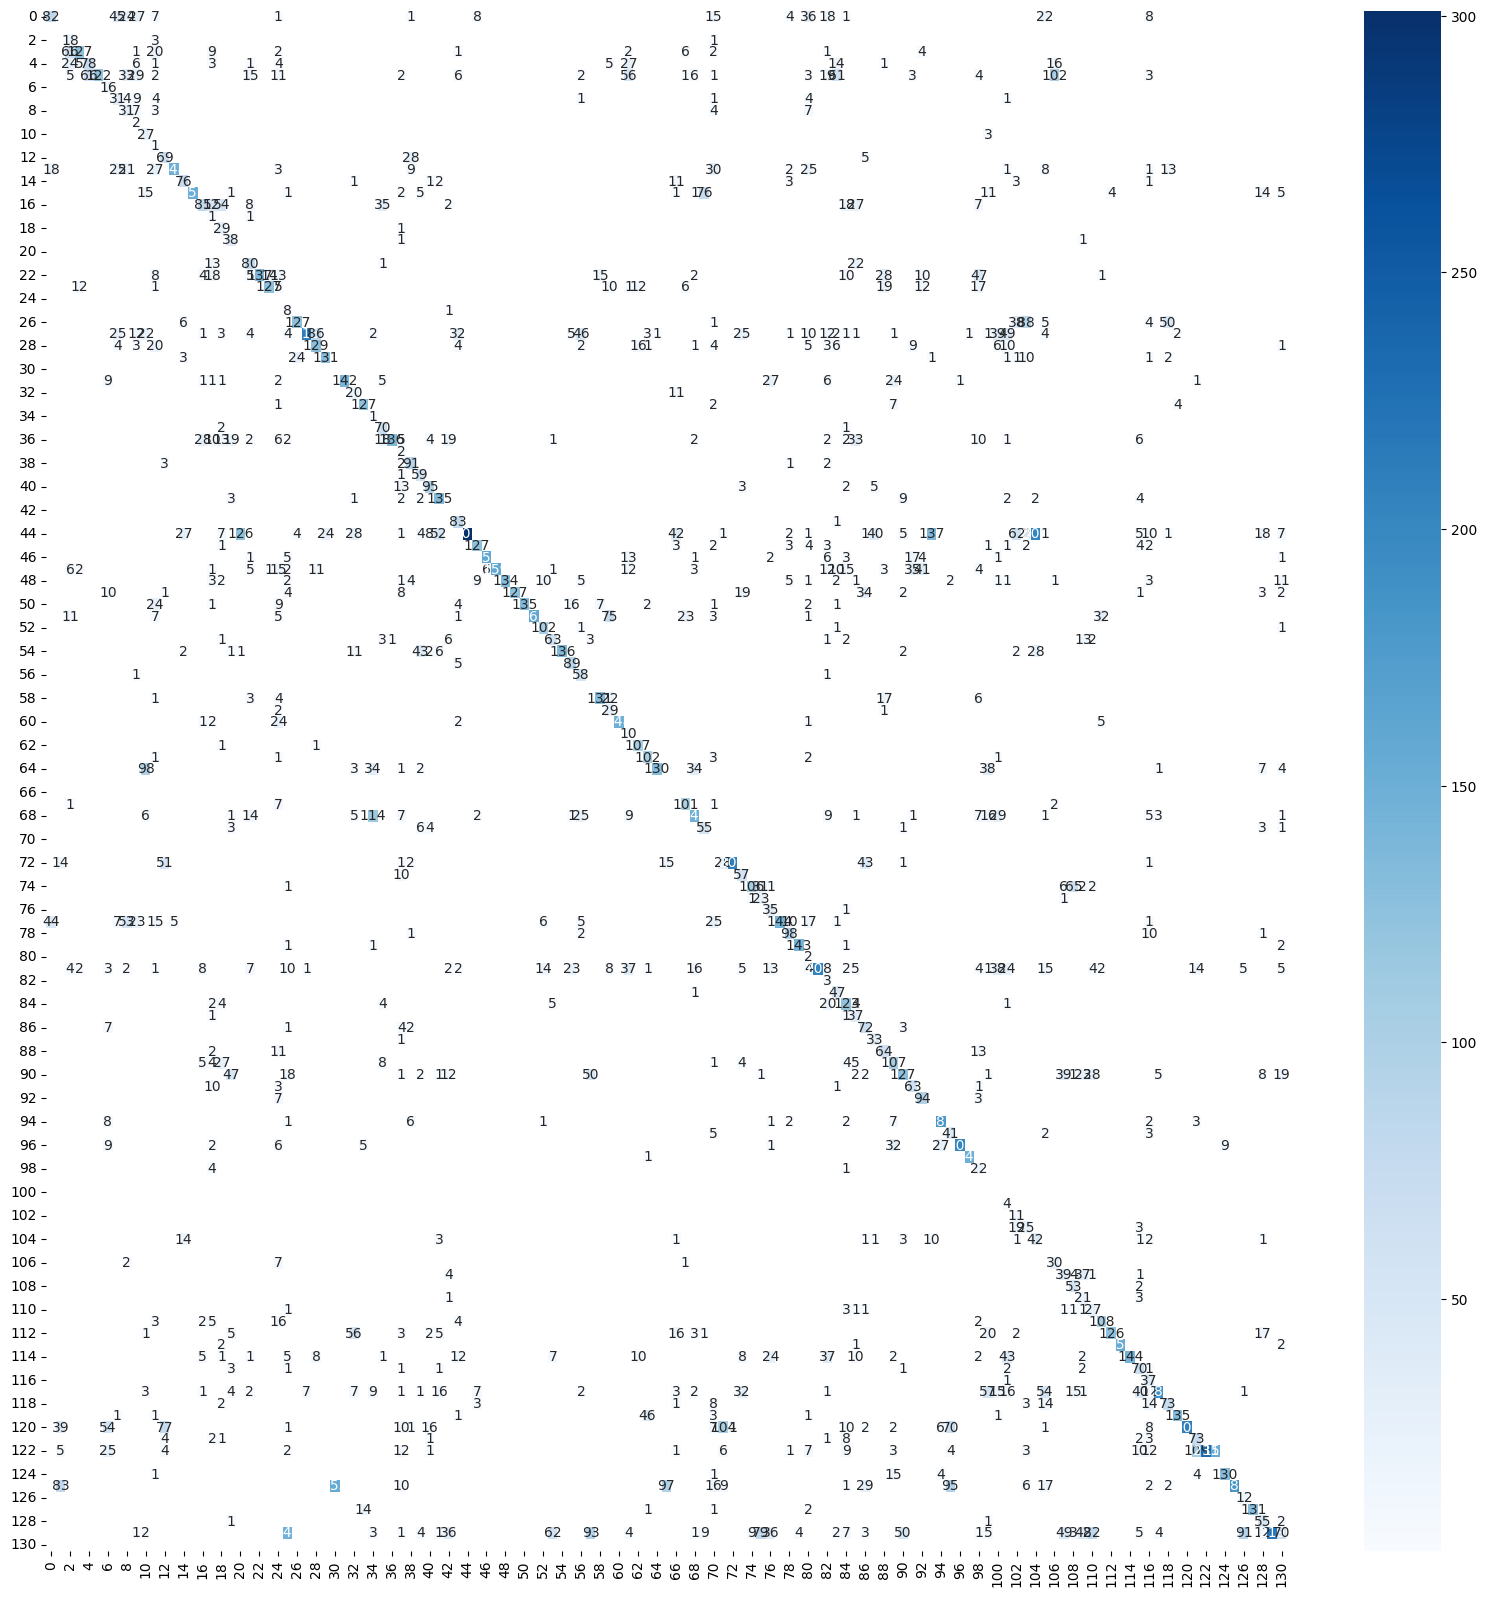

In [106]:
cm = confusion_matrix(intclass_test_pred3,new_test_intclass)
df = pd.DataFrame(cm).replace(0, np.nan)
plt.figure(figsize=[20,20])
sns.heatmap(df, annot=True, fmt='g', cmap="Blues")
plt.show()

In [107]:
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        if i==j:
            df.loc[i,j] = 0

In [108]:
df.columns=stringclass_train
df.index=stringclass_train
df

,Apple Braeburn,Apple Crimson Snow,Apple Golden 1,Apple Golden 2,Apple Golden 3,Apple Granny Smith,Apple Pink Lady,Apple Red 1,Apple Red 2,Apple Red 3,...,Tomato 2,Tomato 3,Tomato 4,Tomato Cherry Red,Tomato Heart,Tomato Maroon,Tomato Yellow,Tomato not Ripened,Walnut,Watermelon
Apple Braeburn,0.0,NaN,NaN,NaN,NaN,NaN,NaN,45.0,24.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apple Crimson Snow,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apple Golden 1,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apple Golden 2,NaN,NaN,66.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apple Golden 3,NaN,NaN,24.0,5.0,0.0,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tomato Maroon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
Tomato Yellow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
Tomato not Ripened,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2.0
Walnut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,91.0,NaN,12.0,0.0,70.0


In [109]:
maxim = df.max().max()

In [110]:
df.loc[(df==maxim).any()]

,Apple Braeburn,Apple Crimson Snow,Apple Golden 1,Apple Golden 2,Apple Golden 3,Apple Granny Smith,Apple Pink Lady,Apple Red 1,Apple Red 2,Apple Red 3,...,Tomato 2,Tomato 3,Tomato 4,Tomato Cherry Red,Tomato Heart,Tomato Maroon,Tomato Yellow,Tomato not Ripened,Walnut,Watermelon
Plum 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [111]:
df_bol = (df==maxim)
df_bol

,Apple Braeburn,Apple Crimson Snow,Apple Golden 1,Apple Golden 2,Apple Golden 3,Apple Granny Smith,Apple Pink Lady,Apple Red 1,Apple Red 2,Apple Red 3,...,Tomato 2,Tomato 3,Tomato 4,Tomato Cherry Red,Tomato Heart,Tomato Maroon,Tomato Yellow,Tomato not Ripened,Walnut,Watermelon
Apple Braeburn,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Apple Crimson Snow,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Apple Golden 1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Apple Golden 2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Apple Golden 3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tomato Maroon,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Tomato Yellow,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Tomato not Ripened,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Walnut,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [112]:
df_bol.loc[(df_bol.sum(axis=1) != 0), (df_bol.sum(axis=0) != 0)]

,Plum 3
Grape Blue,True


In [113]:
df.loc['Grape Blue', 'Plum 3']

203.0

The highest confusion found in this model is for real 'Grape Blue' classified as 'Plum 3'
where the absolute error is of 203

on original test set

In [41]:
nsamples, nx, ny, nrgb = test_images_array.shape
or_test_flat_images_array = test_images_array.reshape((nsamples,nx*ny*nrgb))

In [42]:
intclass_or_test_pred = final_rf.predict(or_test_flat_images_array)
intclass_or_test_pred

array([129,  64,  22, ...,  58,  64,  16])

In [44]:
acc_test = accuracy_score(intclass_or_test_pred,intclass_test)
acc_test

0.4899065585331453

In [45]:
print("The predicted Data is :")
print(np.array(intclass_or_test_pred))
print("The actual data is:")
print(np.array(intclass_test))
print(f"The model is {acc_test*100}% accurate (in the test set)")

The predicted Data is :
[129  64  22 ...  58  64  16]
The actual data is:
[107  64  88 ...  58  64  16]
The model is 48.99065585331453% accurate (in the test set)


In [46]:
print(classification_report(intclass_or_test_pred,intclass_test))

              precision    recall  f1-score   support

           0       0.54      0.24      0.33       368
           1       0.00      0.00      0.00         0
           2       0.08      1.00      0.15        13
           3       0.87      0.54      0.67       264
           4       0.32      0.35      0.33       146
           5       0.88      0.24      0.37       608
           6       0.25      0.95      0.40        40
           7       0.14      0.64      0.23        36
           8       0.14      0.82      0.24        28
           9       0.00      0.00      0.00         0
          10       0.16      0.90      0.27        29
          11       0.00      0.00      0.00         0
          12       0.53      0.72      0.61       160
          13       0.68      0.36      0.47       314
          14       0.80      0.82      0.81       139
          15       1.00      0.46      0.63       358
          16       0.68      0.33      0.44       345
          17       0.01    

c:\Users\aog\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aog\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aog\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

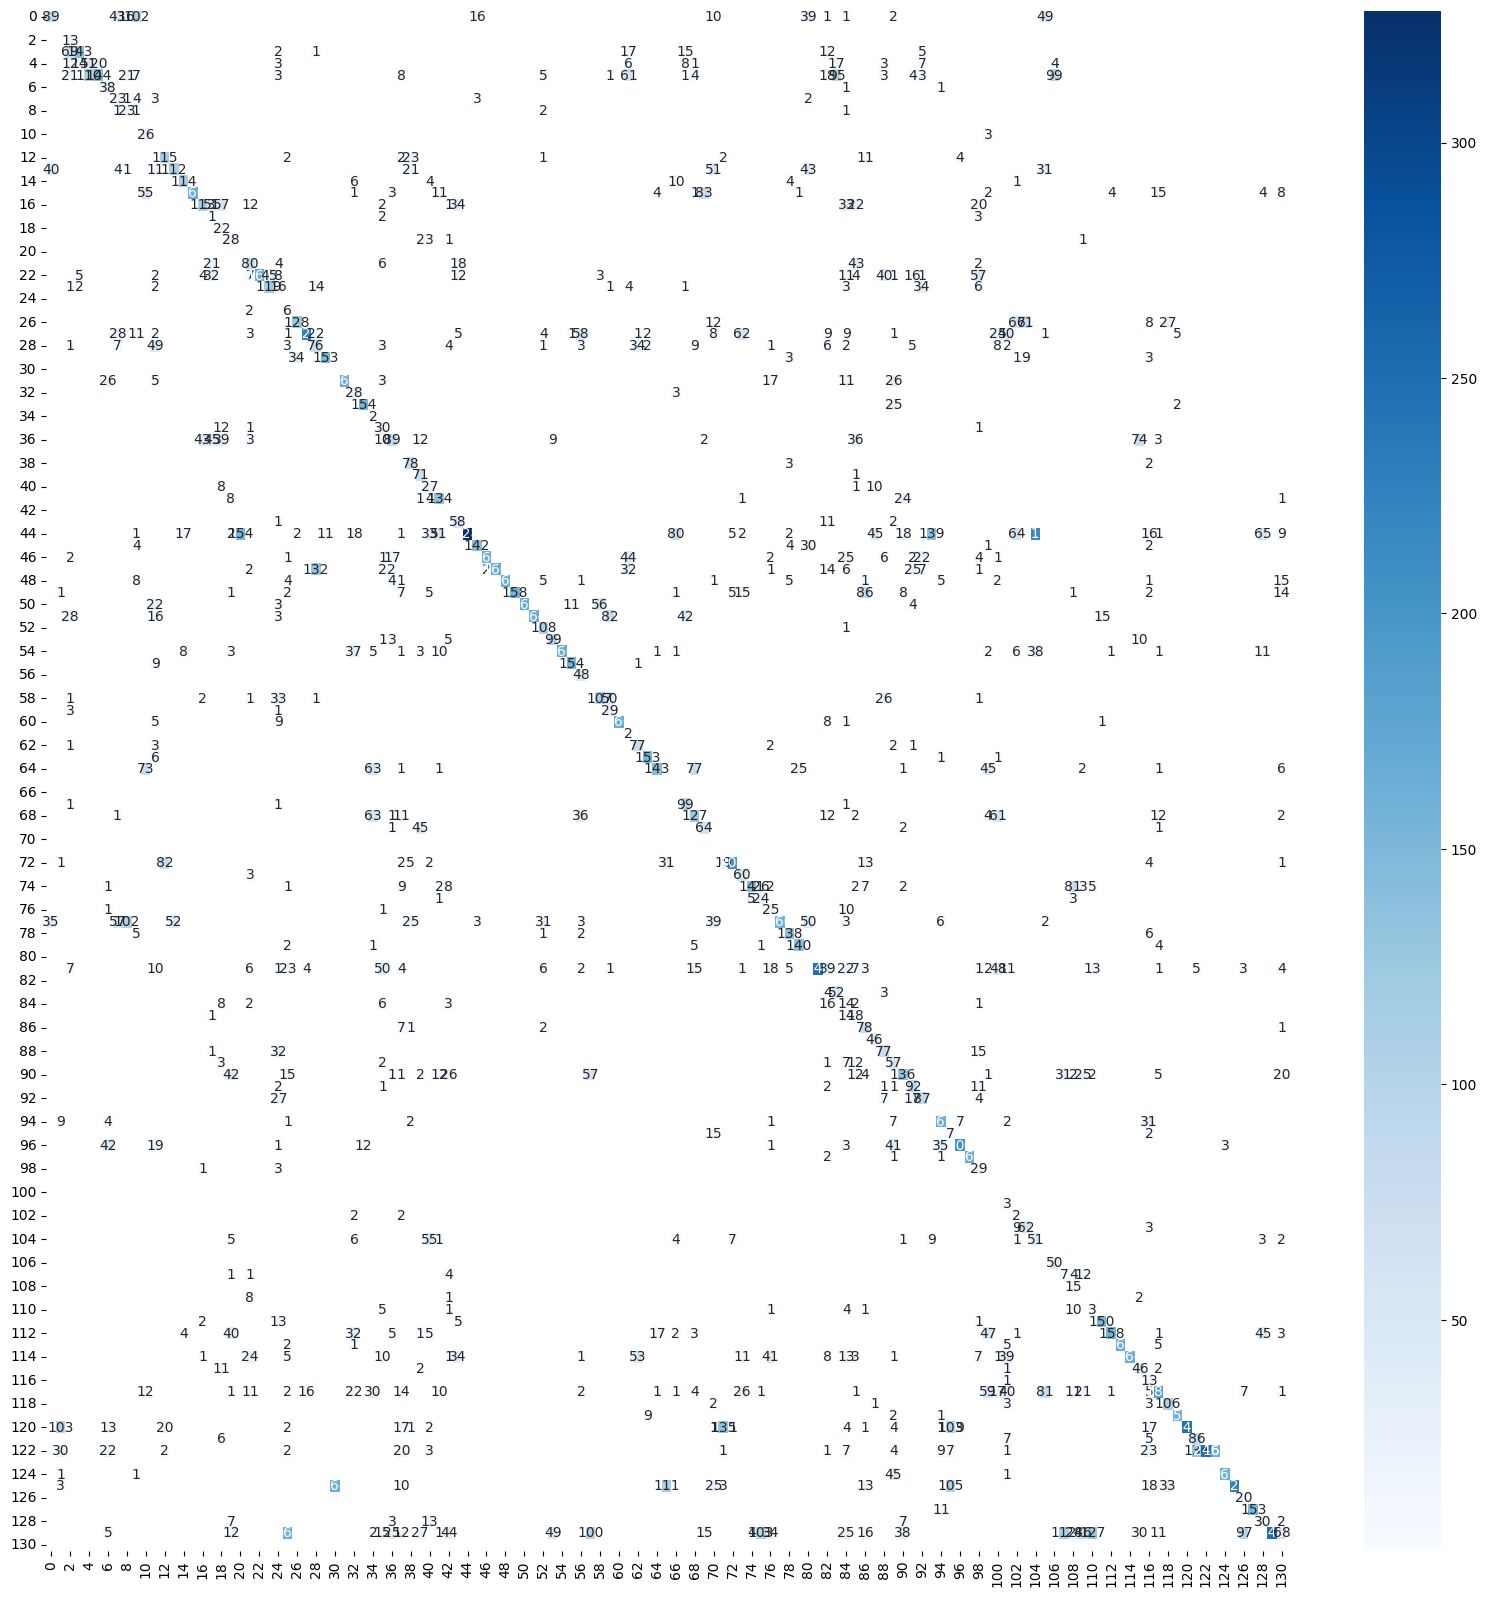

In [50]:
cm = confusion_matrix(intclass_or_test_pred,intclass_test)
df = pd.DataFrame(cm).replace(0, np.nan)
plt.figure(figsize=[20,20])
sns.heatmap(df, annot=True, fmt='g', cmap="Blues")
plt.show()